### <center> <font color='sky blue'>Sensor Data System Setup and Validation Stimulation </center>

<center><h3>Goal 🎯: To stimulate a basic sensor system setup</h3></center>

I made a mock data(like passenger movement in zones) which will be used throughout the project
- Load and Clean it 
- validate it 
- visualize it 
- Making a report on the System setup & Validation 
- Make a jira ticket 
- Save the work

### 1. Importing and cleaning the data

In [19]:
### Importing necessary libraries and reading the csv file 

import pandas as pd 
import numpy as np 

sensor_data = pd.read_csv('sensor_data.csv')

In [20]:
sensor_data.head(10)

,timestamp,sensor_id,zone,count
0,2025-07-23 10:00:00,S1,C,13
1,2025-07-23 10:01:00,S3,B,7
2,2025-07-23 10:02:00,S2,C,18
3,2025-07-23 10:03:00,S1,C,1
4,2025-07-23 10:04:00,S3,C,9
5,2025-07-23 10:05:00,S2,B,5
6,2025-07-23 10:06:00,S3,A,13
7,2025-07-23 10:07:00,S2,B,14
8,2025-07-23 10:08:00,S3,A,11
9,2025-07-23 10:09:00,S1,A,4


In [21]:
## Check for null values and fill/clean the imported csv
sensor_data.isna().sum()

timestamp    0
sensor_id    0
zone         0
count        0
dtype: int64

In [22]:
## Finding abnormal data points or to ensure no data point is out of normal distribution
abnormal_counts = sensor_data[(sensor_data['count'] < 0) | (sensor_data['count'] > 100)]
len(abnormal_counts)

0

### 2. validate the data

In [ ]:
#expected sensors and zones
expected_sensors = {'S1', 'S2', 'S3'}
expected_zones = {'A', 'B', 'C'}

#Check for missing sensors
actual_sensors = set(sensor_data['sensor_id'].unique())
missing_sensors = expected_sensors - actual_sensors

#Check for missing zones
actual_zones = set(sensor_data['zone'].unique())
missing_zones = expected_zones - actual_zones

In [ ]:
#Check for zero-count minutes 
sensor_data['timestamp'] = pd.to_datetime(sensor_data['timestamp'])
sensor_data['minute'] = sensor_data['timestamp'].dt.floor('min')
zero_count_minutes = sensor_data.groupby('minute')['count'].sum()
zero_count_periods = zero_count_minutes[zero_count_minutes == 0]

In [28]:
# Print results
print("Missing Sensors:", missing_sensors)
print("Missing Zones:", missing_zones)
print("Number of abnormal count entries:", len(abnormal_counts))
print("Number of zero-count time periods:", len(zero_count_periods))

Missing Sensors: set()
Missing Zones: set()
Number of abnormal count entries: 0
Number of zero-count time periods: 58


### 3. Visualization 


In [35]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

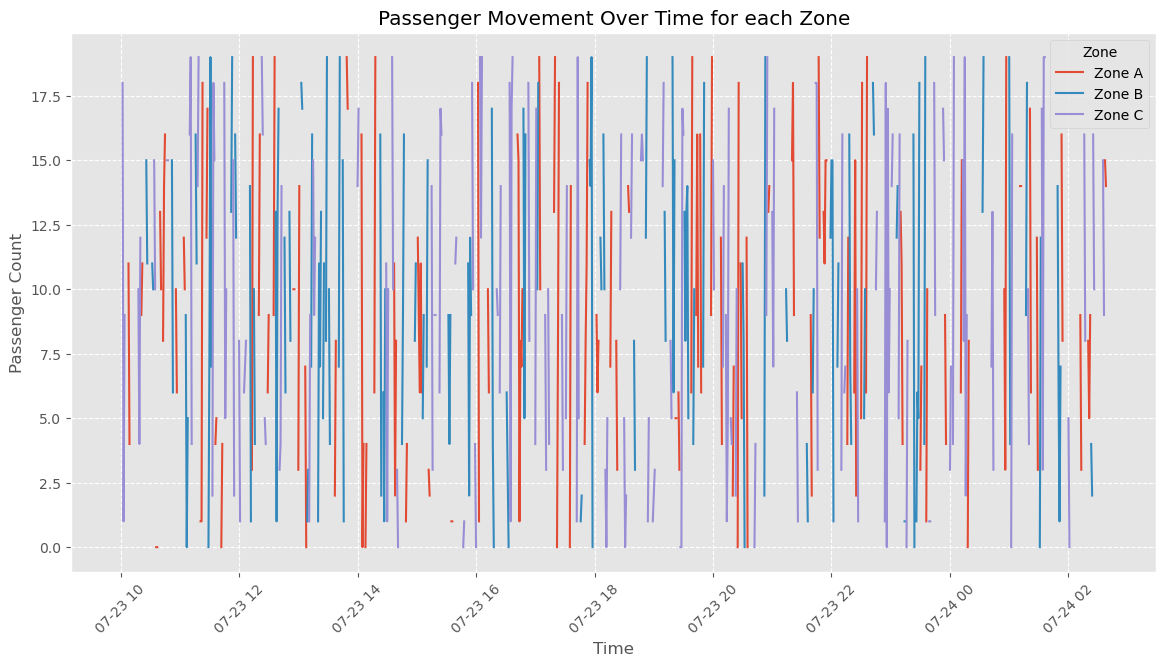

In [64]:
# Plotting passenger movement over time for each zone
sensor_data_sorted = sensor_data.sort_values('timestamp')

#group for the plotting 
zone_time_series = sensor_data_sorted.groupby(['timestamp', 'zone'])['count'].sum().unstack()

plt.figure(figsize=(14,7))
for zone in zone_time_series.columns:
    plt.plot(zone_time_series.index, zone_time_series[zone], label=f'Zone {zone}')
plt.title("Passenger Movement Over Time for each Zone")
plt.xlabel('Time')
plt.ylabel('Passenger Count')
plt.grid(True, linestyle='--')
plt.legend(title='Zone')
plt.xticks(rotation=45)
plt.show()


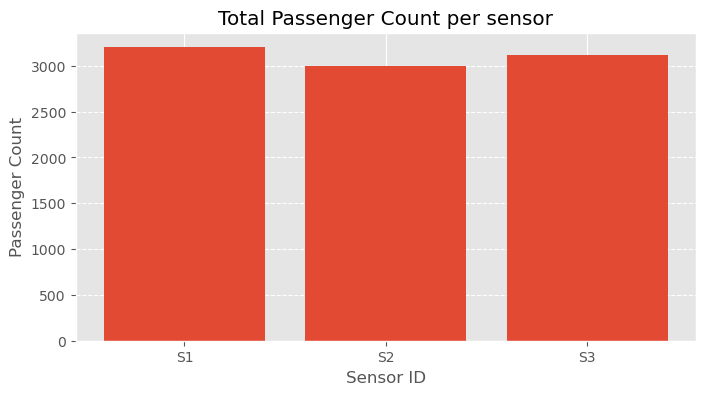

In [ ]:
# Plotting total passenger count per sensor
total_per_sensor = sensor_data_sorted.groupby('sensor_id')['count'].sum()

plt.figure(figsize=(8,4))

plt.bar(total_per_sensor.index, total_per_sensor.values)

plt.title("Total Passenger Count per sensor")
plt.xlabel('Sensor ID')
plt.ylabel('Passenger Count')
plt.grid(axis='y', linestyle='--')
plt.show()


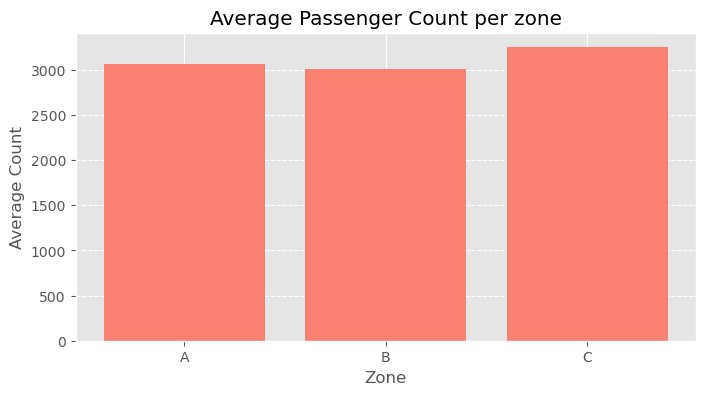

In [73]:
# Plotting Average Passenger Count per Zone
total_per_sensor = sensor_data_sorted.groupby('zone')['count'].sum()

plt.figure(figsize=(8,4))

plt.bar(total_per_sensor.index, total_per_sensor.values, color='salmon')

plt.title("Average Passenger Count per zone")
plt.xlabel('Zone')
plt.ylabel('Average Count')
plt.grid(axis='y', linestyle='--')
plt.show()

### 4. 📋 Sensor System Validation & Setup Report

#### 4.1 Project Overview
This report summarizes the setup and validation of a simulated 3D sensor-based passenger tracking system. The dataset contains 1000 time-series records across 3 zones and 3 sensors.

---

#### 4.2 System Configuration
- **Total Sensors:** 3 (S1, S2, S3)  
- **Total Zones:** 3 (A, B, C)  
- **Time Window:** 23 July 2025, starting from 10:00 AM  
- **Data Format:** CSV file with `timestamp`, `sensor_id`, `zone`, `count`

---

#### 4.3 Validation Checks Performed

| Validation Check              | Status | Notes                                      |
|------------------------------|--------|--------------------------------------------|
| Sensor activity present       | ✅ Pass | All expected sensors reported               |
| Zone mapping verified         | ✅ Pass | All zones active in data                   |
| Abnormal count detection      | ✅ Pass | No negative or unrealistic values detected |
| Zero-flow periods             | ⚠️ Minor Gaps | Few time windows had total count = 0        |

---

#### 4.4 Data Visualizations

- 📈 Passenger movement over time by zone
- 📊 Total passenger count per sensor  
- 📊 Average passenger count per zone 

_*(Visuals attached separately)*_

---

#### 4.5 Issues Found
- Minor dips in passenger activity detected at isolated timestamps  
- Possible reasons: low footfall or brief sensor/network inactivity

---

#### 4.6 Next Steps
- Continue monitoring system behavior for anomalies  
- No critical validation failures observed

### 5. Create a jira ticket 

Made a jira ticket on the atlassian.net under the name of Sensor System Validation


### 6. Saving the data
ALl the files are saved on the notebook 